In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import os
#from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn import neighbors, linear_model

import seaborn as sns

In [2]:
turnover = pd.read_csv('turnover.csv',engine='python',encoding='latin1')

In [3]:
turnover.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [4]:
turnover.isnull().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

In [5]:
print(turnover.dtypes)

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object


In [6]:
gender_lookup = {v:k for k,v in enumerate(turnover['gender'].unique().tolist())}
def gender_transform(gender):
   return gender_lookup[gender]

turnover['gender_enum'] = turnover['gender'].apply(gender_transform)
#male is 0, female is 1

way_lookup = {v:k for k,v in enumerate(turnover['way'].unique().tolist())}
def way_transform(way):
   return way_lookup[way]

turnover['way_enum'] = turnover['way'].apply(way_transform)
#0 is bus, 1 is car, 2 is other

In [7]:
print(turnover.gender_enum)

0       0
1       0
2       1
3       1
4       0
       ..
1124    1
1125    1
1126    1
1127    1
1128    1
Name: gender_enum, Length: 1129, dtype: int64


Text(0, 0.5, '# of employees')

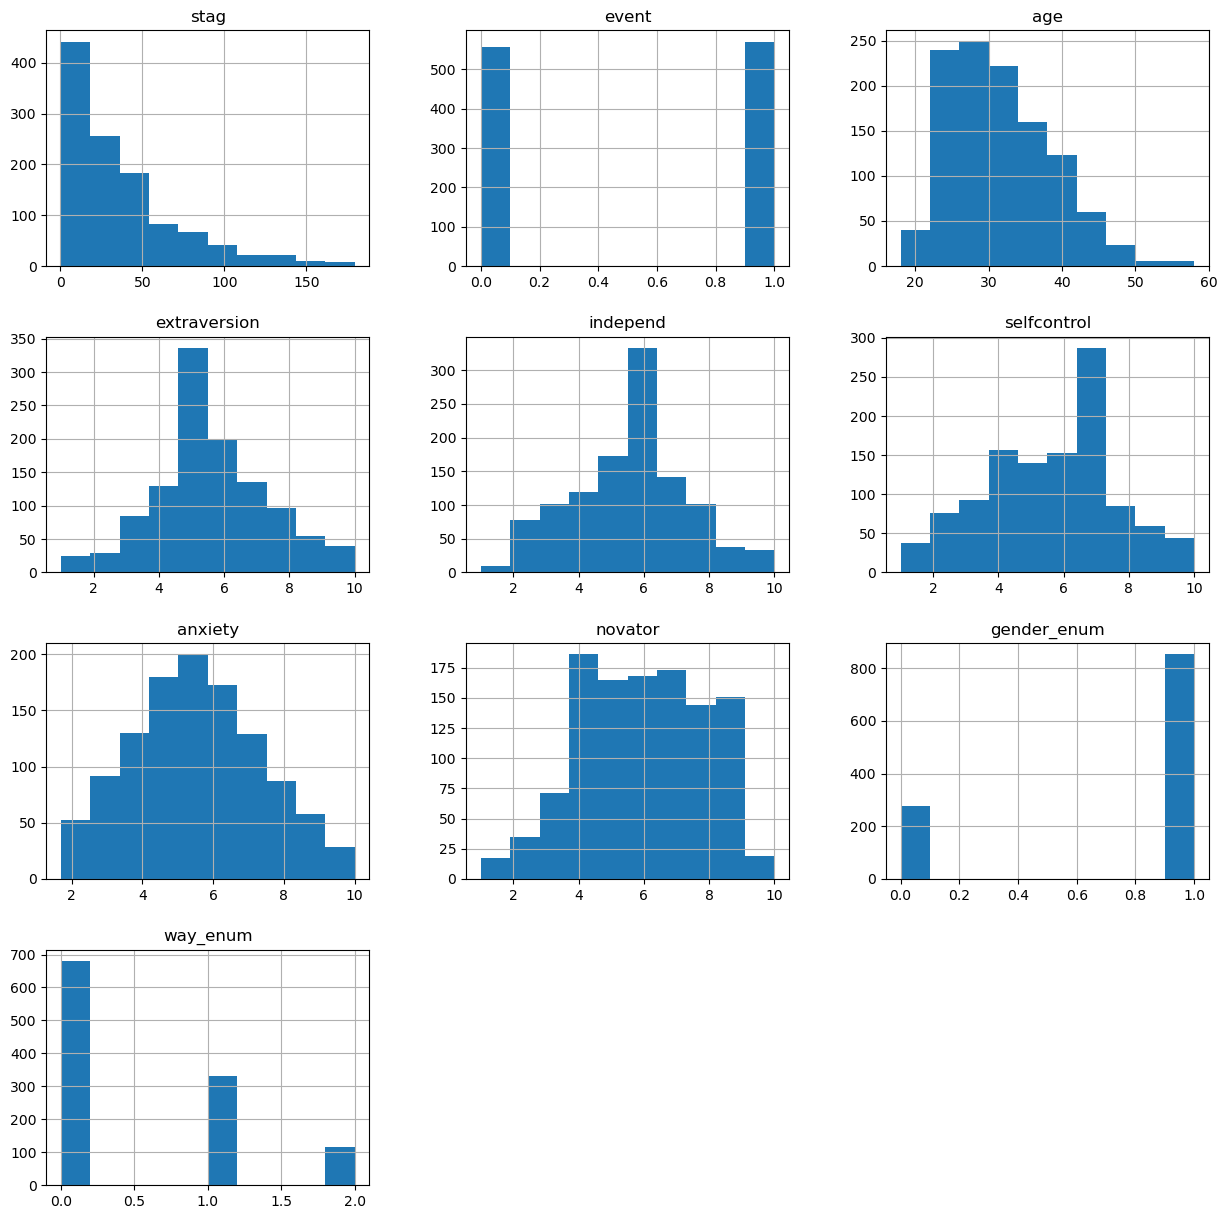

In [8]:
turnover.hist(figsize=[15,15])
plt.ylabel("# of employees")
#stag is experience
#event is 0 for not leaving, 1 for turnover

In [9]:
turnover1 = turnover[['stag', 'event', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'gender_enum', 'way_enum']]
turnover1.describe

<bound method NDFrame.describe of             stag  event   age  extraversion  independ  selfcontrol  anxiety  \
0       7.030801      1  35.0           6.2       4.1          5.7      7.1   
1      22.965092      1  33.0           6.2       4.1          5.7      7.1   
2      15.934292      1  35.0           6.2       6.2          2.6      4.8   
3      15.934292      1  35.0           5.4       7.6          4.9      2.5   
4       8.410678      1  32.0           3.0       4.1          8.0      7.1   
...          ...    ...   ...           ...       ...          ...      ...   
1124   10.611910      0  41.0           8.6       3.4          2.6      4.8   
1125   10.611910      0  41.0           8.6       3.4          2.6      4.8   
1126  118.800821      0  34.0           4.6       5.5          7.2      6.3   
1127   49.412731      0  51.0           3.8       7.6          5.7      6.3   
1128   24.837782      0  29.0           9.4       1.2          4.1      5.6   

      novator  ge

<Axes: >

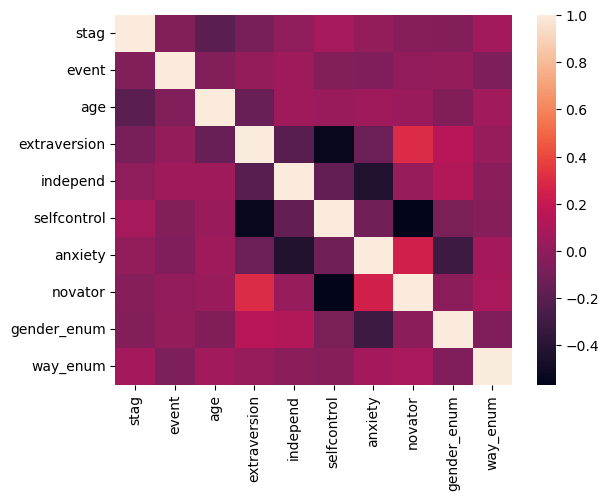

In [10]:
sns.heatmap(turnover1.corr())

In [11]:
X = turnover1[['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'gender_enum', 'way_enum']]

y = turnover1[['event']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
Xs = preprocessing.scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 7)

In [15]:
knn_model_1 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_1.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_1.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_1.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.561947
k-NN score for training set: 0.703212
              precision    recall  f1-score   support

           0       0.54      0.61      0.57       108
           1       0.59      0.52      0.55       118

    accuracy                           0.56       226
   macro avg       0.56      0.56      0.56       226
weighted avg       0.57      0.56      0.56       226



C:\Users\ajren\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
